In [1]:
from matplotlib import pyplot as plt
import numpy as np
from iminuit import Minuit
from iminuit.cost import LeastSquares
import math

In [2]:
evt_x = np.loadtxt("data/fit-data-1.txt")

In [3]:
print('max: ', evt_x.max())
print('entries: ', len(evt_x))

max:  97.05734290236616
entries:  440


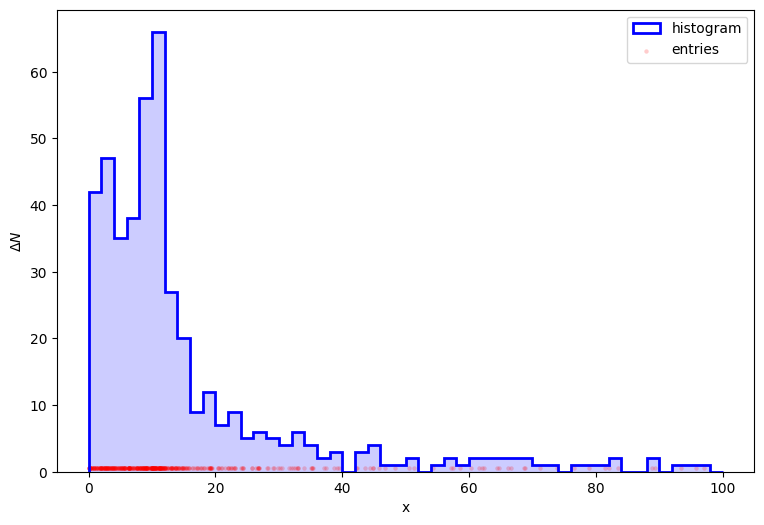

In [4]:
fig, ax = plt.subplots(figsize=(9,6),dpi=100)
n_bins = 50
x_range = (0, 100)
data_y, bins, patches = ax.hist(evt_x, n_bins, range=x_range, density=False, 
    histtype=u'step', edgecolor='b', linewidth=2, label='histogram')
ax.hist(evt_x, n_bins, range=x_range, density=False, color='b', alpha=0.2)
ax.scatter(evt_x, np.full_like(evt_x, 0.5), marker='o', color='r', s=10, alpha=0.2, linewidth=0, label='entries')
plt.xlabel('x')
plt.ylabel('$\Delta N$')
plt.legend()
plt.show()

In [17]:
data_x = (bins+(bins[1]-bins[0])/2)[:-1]
delta_x = bins[1]-bins[0]
print("𝚫x = {:.2f}".format(delta_x))

𝚫x = 2.00


In [6]:
data_yerr = np.sqrt(data_y)
#print(data_y)
#print(data_yerr)

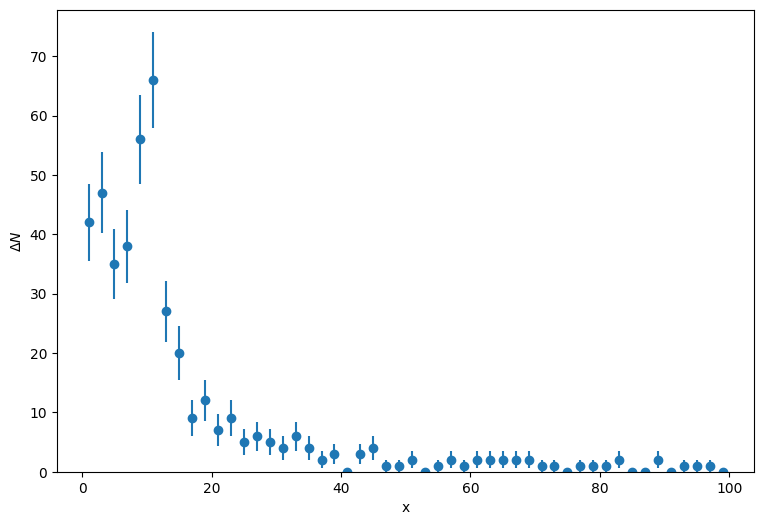

In [7]:
plt.figure(figsize=(9,6),dpi=100)
plt.errorbar(data_x, data_y, data_yerr, fmt="o")
plt.xlabel('x')
plt.ylabel('$\Delta N$')
plt.ylim(0)
plt.show()

In [8]:
def bkg_pdf(x, l):
    return np.exp(-x/l)/l
def sig_pdf(x, mu, sigma):
    return np.exp(-((x - mu)/sigma)**2/2)/math.sqrt(2*math.pi*sigma**2)
def bkg_model(x, b, l):
    return b*bkg_pdf(x, l)
def sig_model(x, s, mu, sigma):
    return s*sig_pdf(x, mu, sigma)
def fit_model(x, b, l, s, mu, sigma):
    return bkg_model(x, b, l) + sig_model(x, s, mu, sigma)

In [9]:
least_squares_mode = LeastSquares(data_x[data_y>0], data_y[data_y>0], data_yerr[data_y>0], fit_model)
m = Minuit(least_squares_mode, *(500,5,100,10,2), name=("B", "$\lambda$", "S", "$\mu$", "$\sigma$"))

In [10]:
m.migrad()

/opt/jupyter/venv/lib/python3.11/site-packages/iminuit/_repr_text.py:245: OptionalDependencyWarning: rendering simple LaTeX requires optional package 'unicodeitplus'. Install 'unicodeitplus' manually to enable this functionality.
  with optional_module_for("rendering simple LaTeX"):


┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 29.4 (χ²/ndof = 0.8)       │              Nfcn = 208              │
│ EDM = 2.4e-06 (Goal: 0.0002)     │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬───────────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name      │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼───────────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ B         │    640    │    50     │            │            │         │         │       │
│ 1 │ $\lambda$ │   13.7    │    1.1    │            │            │         │         │       │
│ 2 │ S         │    191    │    34     │            │            │         │         │       │
│ 3 │ $\mu$     │   10.23   │   0.30    │            │            │         │         │       │
│ 4 │ $\sigma$  │   1.65    │   0.35    │            │            │         │         │       │
└───┴───────────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───────────┬───────────────────────────────────────────────────┐
│           │         B $\lambda$         S     $\mu$  $\sigma$ │
├───────────┼───────────────────────────────────────────────────┤
│         B │  2.05e+03      -6.2    -0.8e3      2.80     -6.62 │
│ $\lambda$ │      -6.2      1.25       8.1     -0.06      0.08 │
│         S │    -0.8e3       8.1  1.14e+03     -2.86      6.66 │
│     $\mu$ │      2.80     -0.06     -2.86     0.093     -0.05 │
│  $\sigma$ │     -6.62      0.08      6.66     -0.05     0.124 │
└───────────┴───────────────────────────────────────────────────┘

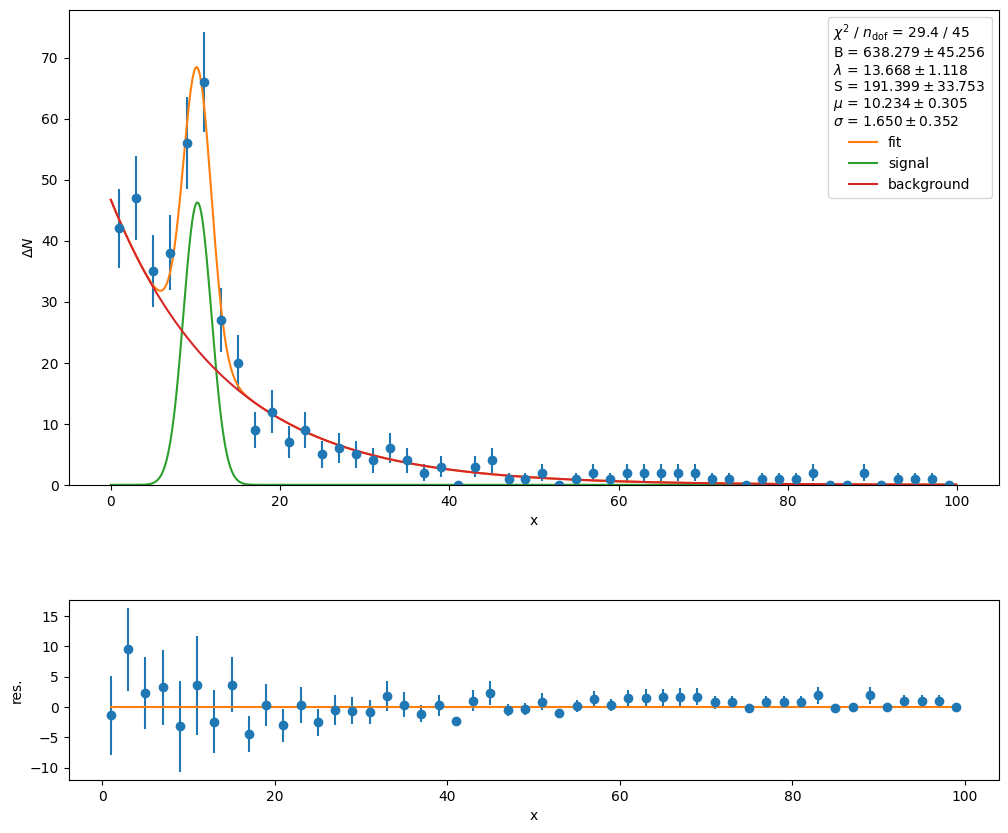

In [11]:
import matplotlib.gridspec as gridspec
data_x_f = np.arange(0, bins[-1], 0.1)
data_y_f = fit_model(data_x_f, *m.values)
bkg_y_f = bkg_model(data_x_f, *m.values[:2])
sig_y_f = sig_model(data_x_f, *m.values[2:])

plt.figure(figsize=(12,10),dpi=100)
gs = gridspec.GridSpec(8, 1)
ax0 = plt.subplot(gs[:5, :])
ax1 = plt.subplot(gs[6:, :])
ax0.errorbar(data_x, data_y, data_yerr, fmt="o")
ax0.plot(data_x_f, data_y_f, label="fit")
ax0.plot(data_x_f, sig_y_f, label="signal")
ax0.plot(data_x_f, bkg_y_f, label="background")
ax0.set_xlabel('x')
ax0.set_ylabel('$\Delta N$')
ax1.errorbar(data_x, (data_y-fit_model(data_x, *m.values)), data_yerr, fmt="o")
ax1.plot([data_x[0],data_x[-1]], [0,0])
ax1.set_xlabel('x')
ax1.set_ylabel('res.')
ax0.set_ylim(0)
ax.legend()

fit_info = [ f"$\\chi^2$ / $n_\\mathrm{{dof}}$ = {m.fval:.1f} / {len(data_x) - m.nfit}" ]
for p, v, e in zip(m.parameters, m.values, m.errors):
    fit_info.append(f"{p} = ${v:.3f} \\pm {e:.3f}$")
ax0.legend(title="\n".join(fit_info))
plt.show()

## Unbinned (meno conveniente)

In [12]:
def neg_log_like_fun(b, l, s, mu, sigma):
    return s + b - np.array([math.log(fit_model(x, b, l, s, mu, sigma)) for x in evt_x]).sum()
neg_log_like_fun.errordef = Minuit.LIKELIHOOD 
g = Minuit(neg_log_like_fun, *(500,13,190,10,1.6), name=("B", "$\lambda$", "S", "$\mu$", "$\sigma$"))
g.limits['B'] = (0, 10000)
g.limits['S'] = (0, 10000)

In [13]:
g.migrad()

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = -633.2                     │              Nfcn = 114              │
│ EDM = 4.56e-05 (Goal: 0.0001)    │            time = 0.3 sec            │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬───────────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name      │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼───────────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ B         │    345    │    25     │            │            │    0    │  10000  │       │
│ 1 │ $\lambda$ │   16.6    │    1.0    │            │            │         │         │       │
│ 2 │ S         │    95     │    20     │            │            │    0    │  10000  │       │
│ 3 │ $\mu$     │   10.09   │   0.32    │            │            │         │         │       │
│ 4 │ $\sigma$  │    1.7    │    0.5    │            │            │         │         │       │
└───┴───────────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───────────┬───────────────────────────────────────────────────┐
│           │         B $\lambda$         S     $\mu$  $\sigma$ │
├───────────┼───────────────────────────────────────────────────┤
│         B │       640      -6.2    -0.3e3      2.13     -6.38 │
│ $\lambda$ │      -6.2     0.938       6.2     -0.06      0.14 │
│         S │    -0.3e3       6.2       391     -2.13      6.39 │
│     $\mu$ │      2.13     -0.06     -2.13     0.105     -0.06 │
│  $\sigma$ │     -6.38      0.14      6.39     -0.06     0.213 │
└───────────┴───────────────────────────────────────────────────┘

**Nota**: di seguito è molto importante non dimenticare di moltiplicare la PDF per $\Delta x$!

In [ ]:
data_x_f = np.arange(0, bins[-1], 0.1)
data_y_f = fit_model(data_x_f, *g.values)*delta_x
bkg_y_f = bkg_model(data_x_f, *g.values[:2])*delta_x
sig_y_f = sig_model(data_x_f, *g.values[2:])*delta_x

plt.figure(figsize=(9,6),dpi=100)
gs = gridspec.GridSpec(8, 1)
ax0 = plt.subplot(gs[:5, :])
ax1 = plt.subplot(gs[6:, :])
ax0.errorbar(data_x, data_y, data_yerr, fmt="o")
ax0.plot(data_x_f, data_y_f, label="fit")
ax0.plot(data_x_f, sig_y_f, label="signal")
ax0.plot(data_x_f, bkg_y_f, label="background")
ax0.set_xlabel('x')
ax0.set_ylabel('$\Delta N$')
ax1.errorbar(data_x, data_y-fit_model(data_x, *g.values), data_yerr, fmt="o")
ax1.plot([data_x[0],data_x[-1]], [0,0])
ax1.set_xlabel('x')
ax1.set_ylabel('res.')
ax0.set_ylim(0)
fit_info = []
for p, v, e in zip(g.parameters, g.values, g.errors):
    fit_info.append(f"{p} = ${v:.3f} \\pm {e:.3f}$")
ax0.legend(title="\n".join(fit_info))
plt.show()